In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import networkx as nx
import statistics

In [21]:
hurricane_harvey_df = pd.read_csv('/home/cquirk/EventCSVs/hurricane_harvey_df.csv')
hurricane_irma_df = pd.read_csv('/home/cquirk/EventCSVs/hurricane_irma_df.csv')
earthquake_mexico_df = pd.read_csv('/home/cquirk/EventCSVs/earthquake_mexico_df.csv')
hurricane_maria_df = pd.read_csv('/home/cquirk/EventCSVs/hurricane_maria_df.csv')
earthquake_costarica_df = pd.read_csv('/home/cquirk/EventCSVs/earthquake_costarica_df.csv')
earthquake_iran_iraq_df = pd.read_csv('/home/cquirk/EventCSVs/earthquake_iran_iraq_df.csv')
mudslide_california_df = pd.read_csv('/home/cquirk/EventCSVs/mudslide_california_df.csv')
windstorm_friederike_df = pd.read_csv('/home/cquirk/EventCSVs/windstorm_friederike_df.csv')
wildfire_nairobi_df = pd.read_csv('/home/cquirk/EventCSVs/wildfire_nairobi_df.csv')

riot_hamburg_G20_df = pd.read_csv('/home/cquirk/EventCSVs/riot_hamburg_G20_df.csv')
riot_charlottesville_df = pd.read_csv('/home/cquirk/EventCSVs/riot_charlottesville_df.csv')
riot_catalonia_df = pd.read_csv('/home/cquirk/EventCSVs/riot_catalonia_df.csv')
riot_philadelphia_superbowl_df = pd.read_csv('/home/cquirk/EventCSVs/riot_philadelphia_superbowl.csv')

school_shooting_tehama_county_df = pd.read_csv('/home/cquirk/EventCSVs/school_shooting_tehama_county_df.csv')
shooting_trebes_france_df = pd.read_csv('/home/cquirk/EventCSVs/shooting_trebes_france_df.csv')
shooting_youtube_HQ_df = pd.read_csv('/home/cquirk/EventCSVs/shooting_youtube_HQ_df.csv')
van_attack_muenster_df = pd.read_csv('/home/cquirk/EventCSVs/van_attack_muenster_df.csv')
school_shooting_santa_fe_df = pd.read_csv('/home/cquirk/EventCSVs/school_shooting_santa_fe_df.csv')

In [22]:
#COSTA RICA REMOVED - no reciprocity
events = [hurricane_harvey_df, hurricane_irma_df, earthquake_mexico_df, hurricane_maria_df, 
          earthquake_iran_iraq_df, mudslide_california_df, windstorm_friederike_df,
          wildfire_nairobi_df, riot_hamburg_G20_df, riot_charlottesville_df, riot_catalonia_df, riot_philadelphia_superbowl_df,
          school_shooting_tehama_county_df, shooting_trebes_france_df, shooting_youtube_HQ_df, van_attack_muenster_df, 
          school_shooting_santa_fe_df]
event_names = ['Hurricane Harvey', 'Hurricane Irma', 'Mexico Earthquake', 'Hurricane Maria', 
          'Iran/Iraq Earthquake', 'California Mudslide', 'Friederike Windstorm',
          'Nairobi Wildfire', 'Hamburg G20 Riot', 'Charlottesville Riot', 'Catalonia Riot', 'Philadelphia Super Bowl Riot',
          'Tehama County Shooting', 'Trebes, France Shooting', 'YouTube HQ Shooting', 'Muenster Van Attack', 
          'Santa Fe School Shooting']
event_types = ['Natural Disaster','Natural Disaster','Natural Disaster','Natural Disaster','Natural Disaster','Natural Disaster',
               'Natural Disaster','Natural Disaster', 'Riot', 'Riot', 'Riot', 'Riot', 'Shooting/Terror',
              'Shooting/Terror', 'Shooting/Terror', 'Shooting/Terror', 'Shooting/Terror']

In [23]:
events2 = [hurricane_harvey_df, hurricane_irma_df, earthquake_mexico_df, hurricane_maria_df, 
          earthquake_costarica_df, earthquake_iran_iraq_df, mudslide_california_df, windstorm_friederike_df,
          wildfire_nairobi_df, riot_hamburg_G20_df, riot_charlottesville_df, riot_catalonia_df, riot_philadelphia_superbowl_df,
          school_shooting_tehama_county_df, shooting_trebes_france_df, shooting_youtube_HQ_df, van_attack_muenster_df, 
          school_shooting_santa_fe_df]
event_names2 = ['Hurricane Harvey', 'Hurricane Irma', 'Mexico Earthquake', 'Hurricane Maria', 
          'Costa Rica Earthquake','Iran/Iraq Earthquake', 'California Mudslide', 'Friederike Windstorm',
          'Nairobi Wildfire', 'Hamburg G20 Riot', 'Charlottesville Riot', 'Catalonia Riot', 'Philadelphia Super Bowl Riot',
          'Tehama County Shooting', 'Trebes, France Shooting', 'YouTube HQ Shooting', 'Muenster Van Attack', 
          'Santa Fe School Shooting']
event_types2 = ['Natural Disaster','Natural Disaster','Natural Disaster','Natural Disaster','Natural Disaster','Natural Disaster',
               'Natural Disaster','Natural Disaster','Natural Disaster', 'Riot', 'Riot', 'Riot', 'Riot', 'Shooting/Terror',
              'Shooting/Terror', 'Shooting/Terror', 'Shooting/Terror', 'Shooting/Terror']

In [6]:
event_reciprocity = pd.DataFrame()

n = len(events)

event_reciprocity['Event'] = [0]*n
event_reciprocity['Category'] = [0]*n
event_reciprocity['Overall'] = [0]*n
event_reciprocity['Anger'] = [0]*n
event_reciprocity['Trust'] = [0]*n
event_reciprocity['Neutral'] = [0]*n
event_reciprocity['Anticipation'] = [0]*n
event_reciprocity['Fear'] = [0]*n
event_reciprocity['Joy'] = [0]*n
event_reciprocity['Disgust'] = [0]*n
event_reciprocity['Sadness'] = [0]*n
event_reciprocity['Surprise'] = [0]*n

In [47]:
def get_reciprocities(event_reciprocity, i):
    df = events[i]
    df_anger = df.loc[df['Emotion'] == 'Anger']
    df_trust = df.loc[df['Emotion'] == 'Trust']
    df_neut = df.loc[df['Emotion'] == 'neutral']
    df_ant = df.loc[df['Emotion'] == 'Anticipation']
    df_fear = df.loc[df['Emotion'] == 'Fear']
    df_joy = df.loc[df['Emotion'] == 'Joy']
    df_dis = df.loc[df['Emotion'] == 'Disgust']
    df_sad = df.loc[df['Emotion'] == 'Sadness']
    df_surp = df.loc[df['Emotion'] == 'Surprise']

    G_anger = nx.from_pandas_edgelist(df_anger, source = 'Source', target = 'Target', create_using=nx.MultiDiGraph())
    G_trust = nx.from_pandas_edgelist(df_trust, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
    G_neut = nx.from_pandas_edgelist(df_neut, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
    G_ant = nx.from_pandas_edgelist(df_ant, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
    G_fear = nx.from_pandas_edgelist(df_fear, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
    G_joy = nx.from_pandas_edgelist(df_joy, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
    G_dis = nx.from_pandas_edgelist(df_dis, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
    G_sad = nx.from_pandas_edgelist(df_sad, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
    G_surp = nx.from_pandas_edgelist(df_surp, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
    G = nx.from_pandas_edgelist(df, source = 'Source', target = 'Target', create_using=nx.MultiDiGraph())

    event_reciprocity['Event'][i] = event_names[i]
    event_reciprocity['Category'][i] = event_types[i]
    event_reciprocity['Overall'][i] = str(round(nx.overall_reciprocity(G),4))
    event_reciprocity['Anger'][i] = str(round(nx.overall_reciprocity(G_anger),4))
    event_reciprocity['Trust'][i] = str(round(nx.overall_reciprocity(G_trust),4))
    event_reciprocity['Neutral'][i] = str(round(nx.overall_reciprocity(G_neut),4))
    event_reciprocity['Anticipation'][i] = str(round(nx.overall_reciprocity(G_ant),4))
    event_reciprocity['Fear'][i] = str(round(nx.overall_reciprocity(G_fear),4))
    event_reciprocity['Joy'][i] = str(round(nx.overall_reciprocity(G_joy),4))
    event_reciprocity['Disgust'][i] = str(round(nx.overall_reciprocity(G_dis),4))
    event_reciprocity['Sadness'][i] = str(round(nx.overall_reciprocity(G_sad),4))
    event_reciprocity['Surprise'][i] = str(round(nx.overall_reciprocity(G_surp),4))

In [48]:
for i in range(n):
    get_reciprocities(event_reciprocity, i)

/tmp/ipykernel_2996657/295261283.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_reciprocity['Category'][i] = event_types[i]
/usr/licensed/anaconda3/2021.11/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/tmp/ipykernel_2996657/295261283.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_reciprocity['Overall'][i] 

KeyboardInterrupt: 

In [7]:
event_reciprocity.to_csv('event_reciprocity.csv')

In [8]:
event_recip_arousal = pd.DataFrame()

n = len(events)

event_recip_arousal['Event'] = [0]*n
event_recip_arousal['Category'] = [0]*n
event_recip_arousal['Overall'] = [0]*n
event_recip_arousal['High Arousal'] = [0]*n
event_recip_arousal['Low Arousal'] = [0]*n

In [9]:
event_recip_misery = pd.DataFrame()

n = len(events)

event_recip_misery['Event'] = [0]*n
event_recip_misery['Category'] = [0]*n
event_recip_misery['Overall'] = [0]*n
event_recip_misery['High Misery'] = [0]*n
event_recip_misery['Low Misery'] = [0]*n

In [10]:
def get_arousal_recip(event_recip_arousal, i):
    input_df = events[i]
    df_high = input_df.loc[(input_df['Emotion'] == 'Anger') | (input_df['Emotion'] == 'Anticipation') | (input_df['Emotion'] == 'Fear') | (input_df['Emotion'] == 'Surprise')]
    df_low = input_df.loc[(input_df['Emotion'] == 'Sadness') | (input_df['Emotion'] == 'Trust') | (input_df['Emotion'] == 'Joy') | (input_df['Emotion'] == 'Disgust') | (input_df['Emotion'] == 'neutral')]

    
    G_high = nx.from_pandas_edgelist(df_high, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
    G_low = nx.from_pandas_edgelist(df_low, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
    G = nx.from_pandas_edgelist(input_df, source = 'Source', target = 'Target', create_using=nx.MultiDiGraph())

    event_recip_arousal['Event'][i] = event_names[i]
    event_recip_arousal['Category'][i] = event_types[i]
    event_recip_arousal['Overall'][i] = str(round(nx.overall_reciprocity(G),4))
    event_recip_arousal['High Arousal'][i] = str(round(nx.overall_reciprocity(G_high),4))
    event_recip_arousal['Low Arousal'][i] = str(round(nx.overall_reciprocity(G_low),4))
    
def get_misery_recip(event_recip_misery, i):
    input_df = events[i]
    df_high = input_df.loc[(input_df['Emotion'] == 'Anger') | (input_df['Emotion'] == 'Fear') | (input_df['Emotion'] == 'Sadness') | (input_df['Emotion'] == 'Disgust')]
    df_low = input_df.loc[(input_df['Emotion'] == 'Trust') | (input_df['Emotion'] == 'Joy') | (input_df['Emotion'] == 'Anticipation') | (input_df['Emotion'] == 'Surprise') | (input_df['Emotion'] == 'neutral')]

    
    G_high = nx.from_pandas_edgelist(df_high, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
    G_low = nx.from_pandas_edgelist(df_low, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
    G = nx.from_pandas_edgelist(input_df, source = 'Source', target = 'Target', create_using=nx.MultiDiGraph())

    event_recip_misery['Event'][i] = event_names[i]
    event_recip_misery['Category'][i] = event_types[i]
    event_recip_misery['Overall'][i] = str(round(nx.overall_reciprocity(G),4))
    event_recip_misery['High Misery'][i] = str(round(nx.overall_reciprocity(G_high),4))
    event_recip_misery['Low Misery'][i] = str(round(nx.overall_reciprocity(G_low),4))

In [11]:
for i in range(n):
    get_arousal_recip(event_recip_arousal, i)

/tmp/ipykernel_3579908/1869881933.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_recip_arousal['Category'][i] = event_types[i]
/usr/licensed/anaconda3/2021.11/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/tmp/ipykernel_3579908/1869881933.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_recip_arousal['Overall

In [12]:
for i in range(n):
    get_misery_recip(event_recip_misery, i)

/tmp/ipykernel_3579908/1869881933.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_recip_misery['Category'][i] = event_types[i]
/tmp/ipykernel_3579908/1869881933.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_recip_misery['Overall'][i] = str(round(nx.overall_reciprocity(G),4))
/tmp/ipykernel_3579908/1869881933.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_recip_misery['High Misery'][i] = str(round(nx.

KeyboardInterrupt: 

In [ ]:
event_recip_arousal.to_csv('event_recip_arousal.csv')
event_recip_misery.to_csv('event_recip_misery.csv')

In [24]:
recip_arousal_df = pd.read_csv('/home/cquirk/event_recip_arousal.csv')
recip_misery_df = pd.read_csv('/home/cquirk/event_recip_misery.csv')

In [25]:
colors_arousal =  ['gray','#bf2424','#1aa7ec']
colors_misery =  ['gray','#7739ad','#d4cb2c']

In [26]:
recip_arousal_df_nat = recip_arousal_df[0:8]
recip_arousal_df_riot = recip_arousal_df[8:12]
recip_arousal_df_terror = recip_arousal_df[12:17]

recip_misery_df_nat = recip_misery_df[0:8]
recip_misery_df_riot = recip_misery_df[8:12]
recip_misery_df_terror = recip_misery_df[12:17]

Text(0.5, 0.98, 'High and Low Arousal Sub-Network Reciprocity')

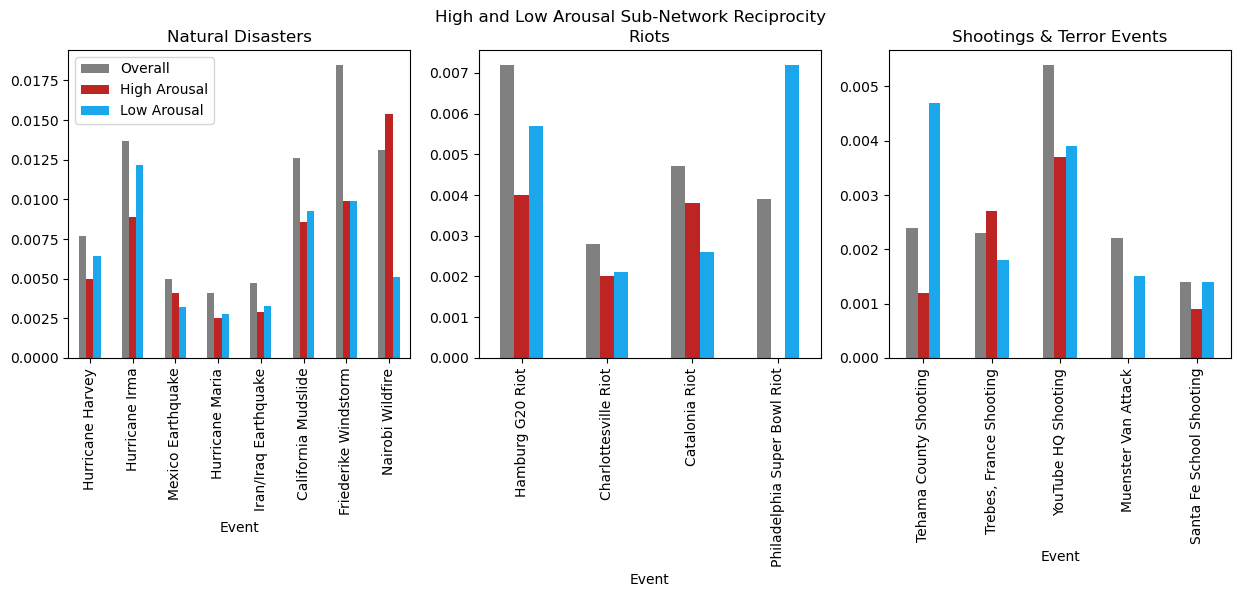

In [27]:
fig, axs = plt.subplots(1,3, figsize=[15,4]) 
axs = axs.ravel()
recip_arousal_df_nat.plot(x="Event", y=["Overall", "High Arousal", "Low Arousal"], color = colors_arousal, kind="bar", ax = axs[0])
recip_arousal_df_riot.plot(x="Event", y=["Overall", "High Arousal", "Low Arousal"], color = colors_arousal, kind="bar", ax = axs[1])
recip_arousal_df_terror.plot(x="Event", y=["Overall", "High Arousal", "Low Arousal"], color = colors_arousal, kind="bar", ax = axs[2])
axs[0].set_title('Natural Disasters')
axs[1].set_title('Riots')
axs[2].set_title('Shootings & Terror Events')
axs[1].get_legend().remove()
axs[2].get_legend().remove()
fig.suptitle('High and Low Arousal Sub-Network Reciprocity')

In [40]:
arousal_mean_nat = recip_arousal_df_nat[['Overall', 'High Arousal', 'Low Arousal']].mean(axis=0)
arousal_mean_riot = recip_arousal_df_riot[['Overall', 'High Arousal', 'Low Arousal']].mean(axis=0)
arousal_mean_terror = recip_arousal_df_terror[['Overall', 'High Arousal', 'Low Arousal']].mean(axis=0)
arousal_mean = recip_arousal_df[['Overall', 'High Arousal', 'Low Arousal']].mean(axis=0)

In [47]:
print("Arousal")
print("Natural Disasters")
print(arousal_mean_nat)
print("Riots")
print(arousal_mean_riot)
print("Terror Events")
print(arousal_mean_terror)
print("All")
print(arousal_mean)

Arousal
Natural Disasters
Overall         0.009925
High Arousal    0.007163
Low Arousal     0.006525
dtype: float64
Riots
Overall         0.00465
High Arousal    0.00245
Low Arousal     0.00440
dtype: float64
Terror Events
Overall         0.00274
High Arousal    0.00170
Low Arousal     0.00266
dtype: float64
All
Overall         0.006571
High Arousal    0.004447
Low Arousal     0.004888
dtype: float64


In [44]:
misery_mean_nat = recip_misery_df_nat[['Overall', 'High Misery', 'Low Misery']].mean(axis=0)
misery_mean_riot = recip_misery_df_riot[['Overall', 'High Misery', 'Low Misery']].mean(axis=0)
misery_mean_terror = recip_misery_df_terror[['Overall', 'High Misery', 'Low Misery']].mean(axis=0)
misery_mean = recip_misery_df[['Overall', 'High Misery', 'Low Misery']].mean(axis=0)

In [46]:
print("Misery")
print("Natural Disasters")
print(misery_mean_nat)
print("Riots")
print(misery_mean_riot)
print("Terror Events")
print(misery_mean_terror)
print("All")
print(misery_mean)

Misery
Natural Disasters
Overall        0.009925
High Misery    0.005650
Low Misery     0.007513
dtype: float64
Riots
Overall        0.00465
High Misery    0.00185
Low Misery     0.00445
dtype: float64
Terror Events
Overall        0.00274
High Misery    0.00104
Low Misery     0.00240
dtype: float64
All
Overall        0.006571
High Misery    0.003400
Low Misery     0.005288
dtype: float64


Text(0.5, 0.98, 'High and Low Misery Sub-Network Reciprocity')

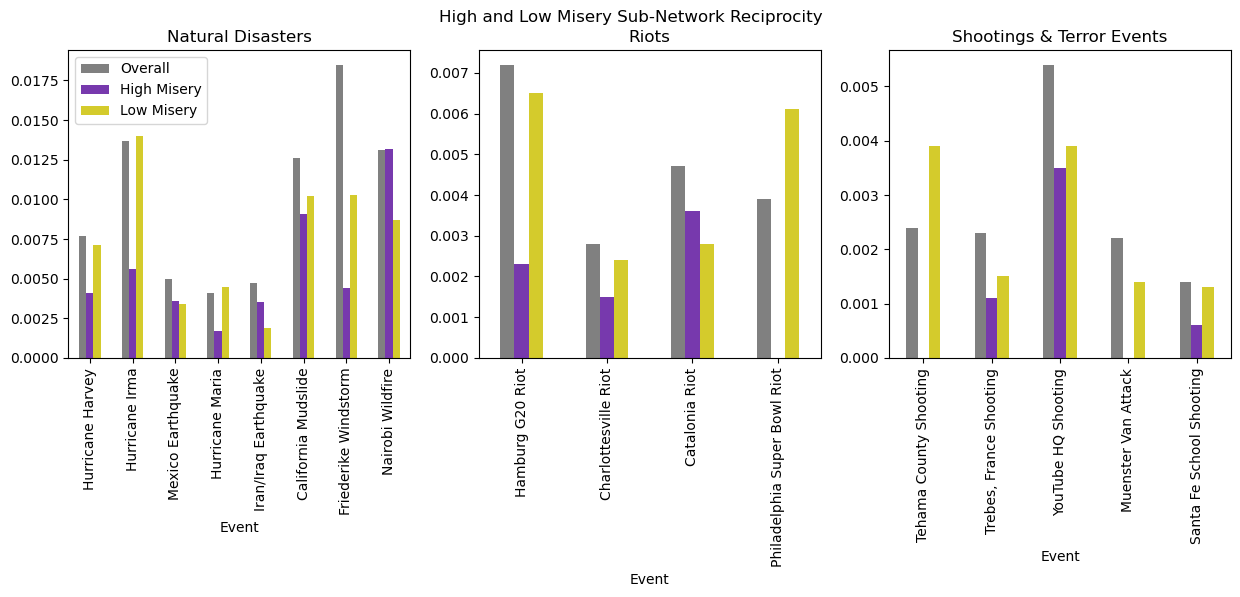

In [28]:
fig, axs = plt.subplots(1,3, figsize=[15,4]) 
axs = axs.ravel()
recip_misery_df_nat.plot(x="Event", y=["Overall", "High Misery", "Low Misery"], color = colors_misery, kind="bar", ax = axs[0])
recip_misery_df_riot.plot(x="Event", y=["Overall", "High Misery", "Low Misery"], color = colors_misery, kind="bar", ax = axs[1])
recip_misery_df_terror.plot(x="Event", y=["Overall", "High Misery", "Low Misery"], color = colors_misery, kind="bar", ax = axs[2])
axs[0].set_title('Natural Disasters')
axs[1].set_title('Riots')
axs[2].set_title('Shootings & Terror Events')
axs[1].get_legend().remove()
axs[2].get_legend().remove()
fig.suptitle('High and Low Misery Sub-Network Reciprocity')

In [29]:
event_recip_misery

,Event,Category,Overall,High Misery,Low Misery
0,Hurricane Harvey,Natural Disaster,0.0077,0.0041,0.0071
1,Hurricane Irma,Natural Disaster,0.0137,0.0056,0.014
2,Mexico Earthquake,Natural Disaster,0.005,0.0036,0.0034
3,Hurricane Maria,Natural Disaster,0.0041,0.0017,0.0045
4,Iran/Iraq Earthquake,Natural Disaster,0.0047,0.0035,0.0019
5,California Mudslide,Natural Disaster,0.0126,0.0091,0.0102
6,Friederike Windstorm,Natural Disaster,0.0185,0.0044,0.0103
7,Nairobi Wildfire,Natural Disaster,0.0131,0.0132,0.0087
8,Hamburg G20 Riot,Riot,0.0072,0.0023,0.0065
9,Charlottesville Riot,Riot,0.0028,0.0015,0.0024


In [ ]:
event_summary = pd.DataFrame()

n = len(events)

event_summary['Event'] = [0]*n
event_summary['Category'] = [0]*n
event_summary['Total Num Nodes'] = [0]*n
event_summary['Total Num Edges'] = [0]*n
event_summary['Num High Arousal Edges'] = [0]*n
event_summary['Num Low Arousal Edges'] = [0]*n
event_summary['Num High Misery Edges'] = [0]*n
event_summary['Num Low Misery Edges'] = [0]*n


In [ ]:
for i in range(n):
    input_df = events[i]
    
    df_high_arousal = input_df.loc[(input_df['Emotion'] == 'Anger') | (input_df['Emotion'] == 'Anticipation') | (input_df['Emotion'] == 'Fear') | (input_df['Emotion'] == 'Surprise')]
    df_low_arousal = input_df.loc[(input_df['Emotion'] == 'Sadness') | (input_df['Emotion'] == 'Trust') | (input_df['Emotion'] == 'Joy') | (input_df['Emotion'] == 'Disgust') | (input_df['Emotion'] == 'neutral')]

    df_high_misery = input_df.loc[(input_df['Emotion'] == 'Anger') | (input_df['Emotion'] == 'Fear') | (input_df['Emotion'] == 'Sadness') | (input_df['Emotion'] == 'Disgust')]
    df_low_misery = input_df.loc[(input_df['Emotion'] == 'Trust') | (input_df['Emotion'] == 'Joy') | (input_df['Emotion'] == 'Anticipation') | (input_df['Emotion'] == 'Surprise') | (input_df['Emotion'] == 'neutral')]

    event_summary['Event'][i] = event_names[i]
    event_summary['Category'][i] = event_types[i]
    
    G = nx.from_pandas_edgelist(input_df, source = 'Source', target = 'Target', create_using=nx.MultiDiGraph())

    G_high_arousal = nx.from_pandas_edgelist(df_high_arousal, source = 'Source', target = 'Target', create_using=nx.MultiDiGraph())
    G_low_arousal = nx.from_pandas_edgelist(df_low_arousal, source = 'Source', target = 'Target', create_using=nx.MultiDiGraph())
    
    G_high_misery = nx.from_pandas_edgelist(df_high_misery, source = 'Source', target = 'Target', create_using=nx.MultiDiGraph())
    G_low_misery = nx.from_pandas_edgelist(df_low_misery, source = 'Source', target = 'Target', create_using=nx.MultiDiGraph())

    event_summary['Total Num Nodes'][i] = G.number_of_nodes()
    event_summary['Total Num Edges'][i] = G.number_of_edges()
    
    #event_summary['Num High Arousal Nodes'][i] = G_high_arousal.number_of_nodes()
    event_summary['Num High Arousal Edges'][i] = G_high_arousal.number_of_edges()
    #event_summary['Num Low Arousal Nodes'][i] = G_low_arousal.number_of_nodes()
    event_summary['Num Low Arousal Edges'][i] = G_low_arousal.number_of_edges()

    #event_summary['Num High Misery Nodes'][i] = G_high_misery.number_of_nodes()
    event_summary['Num High Misery Edges'][i] = G_high_misery.number_of_edges()
    #event_summary['Num Low Misery Nodes'][i] = G_low_misery.number_of_nodes()
    event_summary['Num Low Misery Edges'][i] = G_low_misery.number_of_edges()


In [ ]:
event_summary

In [ ]:
event_summary_arousal = event_summary[['Event', 'Num High Arousal Edges', 'Num Low Arousal Edges']].copy()
event_summary_misery = event_summary[['Event', 'Num High Misery Edges', 'Num Low Misery Edges']].copy()

In [ ]:
color_arousal =  ['#bf2424','#1aa7ec']
color_misery =  ['#7739ad','#d4cb2c']

In [ ]:
event_summary_arousal = event_summary_arousal.rename(columns={"Num High Arousal Edges": 'Number of High Arousal Edges', 'Num Low Arousal Edges': 'Number of Low Arousal Edges'})
event_summary_misery = event_summary_misery.rename(columns={"Num High Misery Edges": 'Number of High Misery Edges', 'Num Low Misery Edges': 'Number of Low Misery Edges'})

In [ ]:
event_summary_arousal.plot( 
    x = 'Event', 
    kind = 'barh', 
    stacked = True,
    color = color_arousal,
    title = 'High and Low Arousal Emotion Breakdown', 
    mark_right = True) 

In [ ]:
event_summary_misery.plot( 
    x = 'Event', 
    kind = 'barh', 
    stacked = True, 
    title = 'High and Low Misery Emotion Breakdown', 
    color = color_misery,
    mark_right = True) 

In [ ]:
#normalize too!
event_summary_arousal_per = event_summary[['Event', 'Total Num Edges', 'Num High Arousal Edges', 'Num Low Arousal Edges']].copy()
event_summary_misery_per = event_summary[['Event', 'Total Num Edges', 'Num High Misery Edges', 'Num Low Misery Edges']].copy()

In [ ]:
event_summary_misery_per

In [128]:
event_summary_arousal_per[['Num High Arousal Edges', 'Num Low Arousal Edges']] = event_summary_arousal_per[['Num High Arousal Edges', 'Num Low Arousal Edges']].div(event_summary_arousal_per['Total Num Edges'], axis=0)
event_summary_arousal_per = event_summary_arousal_per.drop(['Total Num Edges'], axis=1)

In [129]:
event_summary_misery_per[['Num High Misery Edges', 'Num Low Misery Edges']] = event_summary_misery_per[['Num High Misery Edges', 'Num Low Misery Edges']].div(event_summary_misery_per['Total Num Edges'], axis=0)
event_summary_misery_per = event_summary_misery_per.drop(['Total Num Edges'], axis=1)

In [130]:
arousal_mean = event_summary_arousal_per[['Num High Arousal Edges']].mean(axis=0)[0]

In [131]:
arousal_mean

0.5697124977836274

In [132]:
misery_mean = event_summary_misery_per[['Num High Misery Edges']].mean(axis=0)[0]

In [133]:
misery_mean

0.4882789758394138

In [134]:
event_summary_arousal_per = event_summary_arousal_per.rename(columns={"Num High Arousal Edges": '% High Arousal Edges', 'Num Low Arousal Edges': '% Low Arousal Edges'})
event_summary_misery_per = event_summary_misery_per.rename(columns={"Num High Misery Edges": '% High Misery Edges', 'Num Low Misery Edges': '% Low Misery Edges'})

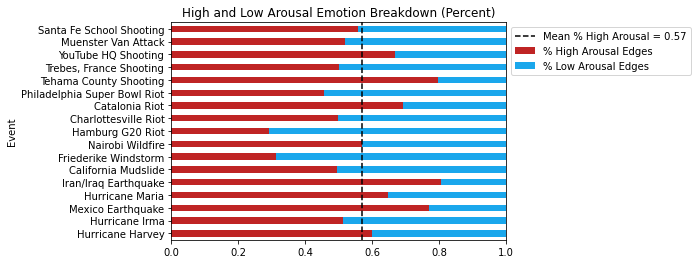

In [135]:
event_summary_arousal_per.plot( 
    x = 'Event', 
    kind = 'barh', 
    stacked = True, 
    title = 'High and Low Arousal Emotion Breakdown (Percent)', 
    color = color_arousal,
    legend=None,
    xlim = (0,1),
    mark_right = True) 

plt.axvline(x = arousal_mean, color = 'k', linestyle='dashed', label = 'Mean % High Arousal = 0.57')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

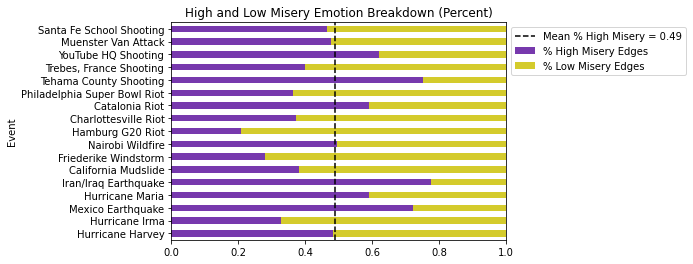

In [136]:
event_summary_misery_per.plot( 
    x = 'Event', 
    kind = 'barh', 
    stacked = True, 
    title = 'High and Low Misery Emotion Breakdown (Percent)', 
    color = color_misery,
    legend=None,
    xlim = (0,1),
    mark_right = True) 
plt.axvline(x = misery_mean, color = 'k', linestyle='dashed', label = 'Mean % High Misery = 0.49')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

In [137]:
event_emotion_breakdown = pd.DataFrame()

n = len(events2)

event_emotion_breakdown['Event'] = [0]*n
event_emotion_breakdown['Category'] = [0]*n
event_emotion_breakdown['Anger'] = [0]*n
event_emotion_breakdown['Anticipation'] = [0]*n
event_emotion_breakdown['Disgust'] = [0]*n
event_emotion_breakdown['Fear'] = [0]*n
event_emotion_breakdown['Joy'] = [0]*n
event_emotion_breakdown['Sadness'] = [0]*n
event_emotion_breakdown['Surprise'] = [0]*n
event_emotion_breakdown['Trust'] = [0]*n
event_emotion_breakdown['Neutral'] = [0]*n

In [84]:
event_emotion = pd.DataFrame()

n = len(events2)

event_emotion['Event'] = [0]*n
event_emotion['Category'] = [0]*n
event_emotion['Overall'] = [0]*n
event_emotion['Anger'] = [0]*n
event_emotion['Anticipation'] = [0]*n
event_emotion['Disgust'] = [0]*n
event_emotion['Fear'] = [0]*n
event_emotion['Joy'] = [0]*n
event_emotion['Sadness'] = [0]*n
event_emotion['Surprise'] = [0]*n
event_emotion['Trust'] = [0]*n
event_emotion['Neutral'] = [0]*n


In [85]:
def get_emotion_breakdown(event_emotion, i):
    df = events2[i]
    df_anger = df.loc[df['Emotion'] == 'Anger']
    df_trust = df.loc[df['Emotion'] == 'Trust']
    df_neut = df.loc[df['Emotion'] == 'neutral']
    df_ant = df.loc[df['Emotion'] == 'Anticipation']
    df_fear = df.loc[df['Emotion'] == 'Fear']
    df_joy = df.loc[df['Emotion'] == 'Joy']
    df_dis = df.loc[df['Emotion'] == 'Disgust']
    df_sad = df.loc[df['Emotion'] == 'Sadness']
    df_surp = df.loc[df['Emotion'] == 'Surprise']
    
    event_emotion['Event'][i] = event_names2[i]
    event_emotion['Category'][i] = event_types2[i]
    event_emotion['Overall'][i] = len(df)
    event_emotion['Anger'][i] = len(df_anger)
    event_emotion['Trust'][i] = len(df_trust)
    event_emotion['Neutral'][i] = len(df_neut)
    event_emotion['Anticipation'][i] = len(df_ant)
    event_emotion['Fear'][i] = len(df_fear)
    event_emotion['Joy'][i] = len(df_joy)
    event_emotion['Disgust'][i] = len(df_dis)
    event_emotion['Sadness'][i] = len(df_sad)
    event_emotion['Surprise'][i] = len(df_surp)

In [86]:
for i in range(n):
    get_emotion_breakdown(event_emotion, i)

/tmp/ipykernel_2294687/4134537301.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_emotion['Category'][i] = event_types2[i]
/tmp/ipykernel_2294687/4134537301.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_emotion['Overall'][i] = len(df)
/tmp/ipykernel_2294687/4134537301.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_emotion['Anger'][i] = len(df_anger)
/tmp/ipykernel_2294687/4134537301.py:17: SettingWit

In [87]:
event_emotion_per = event_emotion.copy()
event_emotion_per[['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust', 'Neutral']] = event_emotion[['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust', 'Neutral']].div(event_emotion_per['Overall'], axis=0)
event_emotion_per = event_emotion_per.drop(['Overall'], axis=1)
event_emotion = event_emotion.drop(['Overall'], axis=1)

In [88]:
colors = ['#d62728', '#ff7f0e','#2ca02c','#9467bd','#bcbd22','#17becf','#e377c2','#1f77b4','gray']

<AxesSubplot:title={'center':'Emotion Specific Breakdown'}, ylabel='Event'>

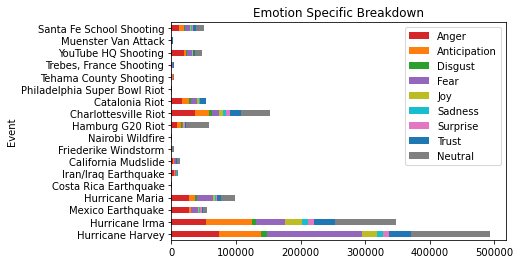

In [89]:
event_emotion.plot( 
    x = 'Event', 
    kind = 'barh', 
    stacked = True, 
    title = 'Emotion Specific Breakdown', 
    color = colors, 
    mark_right = True) 

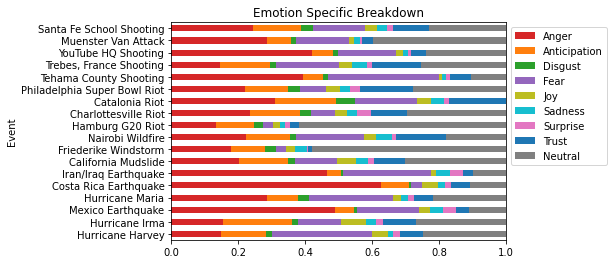

In [91]:
event_emotion_per.plot( 
    x = 'Event', 
    kind = 'barh', 
    stacked = True, 
    title = 'Emotion Specific Breakdown', 
    color = colors,
    xlim = (0,1),
    mark_right = True) 
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')